# <div align="center"> ![Logo](https://www.ups.edu.ec/ups_portal-theme/images/ups/home/logo-ups-home.png)
# <div align="center">  Examen
## Materia:
### <div align="center"> Simulacion
## Docente:
### <div align="center"> Ing. Diego Qusi
## Estudiantes:
### <div align="center"> Ricardo Vinicio Jara Jara

<span style="color:red">Las claves de Twitter que se están utilizando en este examen. Pertenecen a Juan Cañar ya que a mi cuenta de Twitter no es aceptada como cuenta de desarrollador.</span>

### <center> <span style="color:red">Regresión de Twitter</span></center> 

In [550]:
#Importamos Librerias
import pandas as pd
import numpy as np
import tweepy as tw
from tweepy import OAuthHandler
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 

In [551]:
# tokens y claves para acceder apy de twitter
consumer_key = "4JnLpCHZrSNWA9udcVjdoXPYf"
consumer_secret = "3sYWK7vpVCkls36iyf8EVGcPxFmT6F2pXTEZX5PhHxwpyTbEgg"
access_token = "202024170-280kigS0W8n2icIacC0oapfF0Y70LJU86wdQlFtw"
access_token_secret = "CznuxrXC3zCKSGN9elTBhqRko7geQY3BufGmY2RgQe5qr"

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [552]:
#Comprobamos la coneccion a la api
try:
    api.verify_credentials()
    print("Login Exitoso")
except:
    print("Error")

Login Exitoso


### <center> Ingrese Texto a buscar </center>

In [553]:
txtBuscar = input('Ingrese texto a buscar:   ')

Ingrese texto a buscar:   #Ecuador


In [568]:
# Realizamis la busqueda 
#Buscamos los twittes mas populares
ts = api.search(txtBuscar, lang="es", count=100, result_type='popular') 
#Buscamos los twittes mas populares y mas recientes
#ts = api.search(txtBuscar, lang="es", count=100, result_type='mixed') 

In [569]:
#Genereamos nuestro DF
df = pd.DataFrame({'Usuario': list(map(lambda x: x.author.name , ts)),
                   'text': list(map(lambda x: x.text, ts)),
                   'rt': list(map(lambda x: x.retweet_count, ts)),
                   'favoritos': list(map(lambda x: x.favorite_count, ts)),
                   'seguidores': list(map(lambda x: x.author.followers_count, ts)),
                   'numtxt': list(map(lambda x: len(x.text), ts)),
                   'fecha': list(map(lambda x: x.created_at, ts)),
                   'hst':list(map(lambda x: x[0]['text'] if x != [] else '', list(map(lambda x: x.entities['hashtags'], ts))))})
df['fecha'] =pd.to_datetime(df.fecha)
df.sort_values(by='seguidores') 
df

,Usuario,text,rt,favoritos,seguidores,numtxt,fecha,hst
0,Andrés Arauz,Gracias compañeros y compañeras por su respald...,532,1245,55860,103,2020-12-18 20:43:25,Ecuador
1,El Comercio,"""Profe Nancy, buenas tardes. No puedo mandar e...",133,462,1787798,139,2020-12-19 17:36:57,
2,El Comercio,"#ATENCIÓN | Mathías, un bebé que estaba desapa...",43,66,1787798,134,2020-12-19 19:00:00,ATENCIÓN
3,El Comercio,"#Ecuador | “Queremos justicia"". Mauricio, segú...",106,220,1787798,140,2020-12-18 22:30:00,Ecuador
4,Evo Morales Ayma,Nuestro agradecimiento profundo al alcalde de ...,138,633,1182167,140,2020-12-18 19:09:15,Ecuador
5,ufcespanol,ES HORA #Ecuador‼️ pelea co-estelar #UFCVegas1...,34,127,333339,112,2020-12-20 01:57:58,Ecuador
6,JEFF,#Orgullo y #pasión\n\n@chitoveraUFC gracias po...,21,160,285561,140,2020-12-20 02:27:38,Orgullo
7,El Universo,Les compartimos la #ColumnaDeBonil de este 18 ...,432,1067,2214342,131,2020-12-18 12:30:32,ColumnaDeBonil
8,cnegobec,▶️ VIDEO | Con la participación de 16 instituc...,26,12,244695,140,2020-12-18 22:03:01,
9,teleSUR TV,La Corte Nacional de Justicia de #Ecuador🇪🇨 au...,17,12,1951135,140,2020-12-19 23:19:00,Ecuador


<AxesSubplot:xlabel='seguidores'>

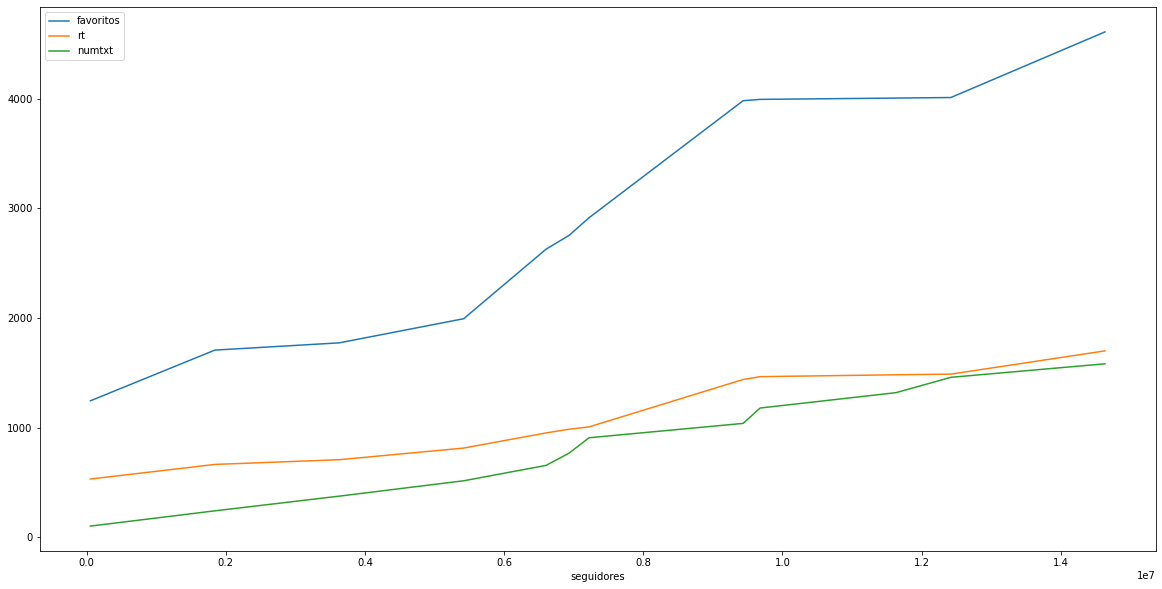

In [570]:
df1 = df.iloc[:, 2:7].cumsum()
df1.plot(x='seguidores', y=['favoritos','rt', 'numtxt'],figsize=(20,10))

# <center> Regresión Lineal<center>

In [571]:
#Sumamos el numero de seguidores + numero de rt y favoritos para obtener un solo punto 
df1["sum"] = df1[['favoritos','rt', 'numtxt']].sum(axis=1)
df2 = df1.iloc[:, [2,5]]
df2

,seguidores,sum
0,55860,1880
1,1843658,2614
2,3631456,2857
3,5419254,3323
4,6601421,4234
5,6934760,4507
6,7220321,4828
7,9434663,6458
8,9679358,6636
9,11630493,6805


In [572]:
x = list(df2.iloc [:, 0]) # seguidores
y = list(df2.iloc [:, 1]) # Total de la suma 

Z= 0.0004485857533154105 * 3740579 + 1569.679617226448 | Prediccion 3247.650065777253


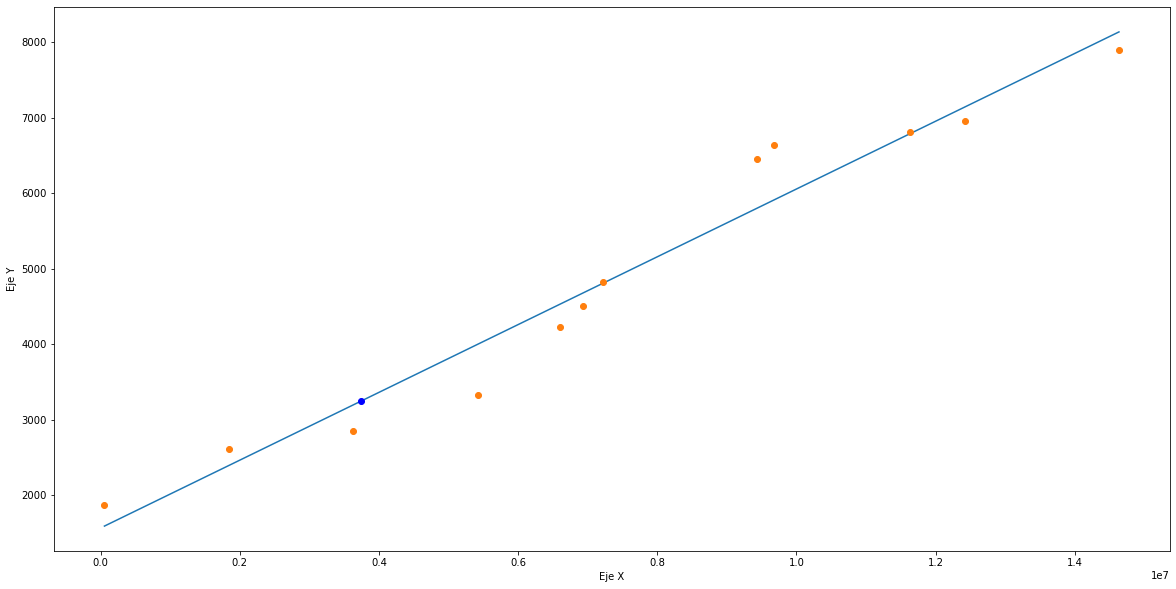

In [573]:
promedio = lambda a,y : sum(x) / len(y)
operacion1 = lambda x,y : sum((x-np.average(x))*(y-np.average(y)))/sum((x-np.average(x))*(x-np.average(x)))
operacion0 = lambda x,y : np.average(y)-operacion1(x,y)*np.average(x)

z = api.get_user('MashiRafael').followers_count

b1 =operacion1(x,y)
b0 =operacion0(x,y)
predecir= b1*z+b0
puntos_x = np.linspace(x[0],x[-1],6)
puntos_y = b0+b1*puntos_x
print('Z=',b1,'*',z,'+',b0, "| Prediccion",predecir)

plt.figure(figsize=(20,10))
plt.plot(puntos_x,puntos_y,)
plt.plot(x,y,"o") 
plt.plot(z,predecir,"o",color='blue') 
plt.xlabel('Eje X')
plt.ylabel('Eje Y')

plt.show()

# <center> Regresión Polinomial<center>

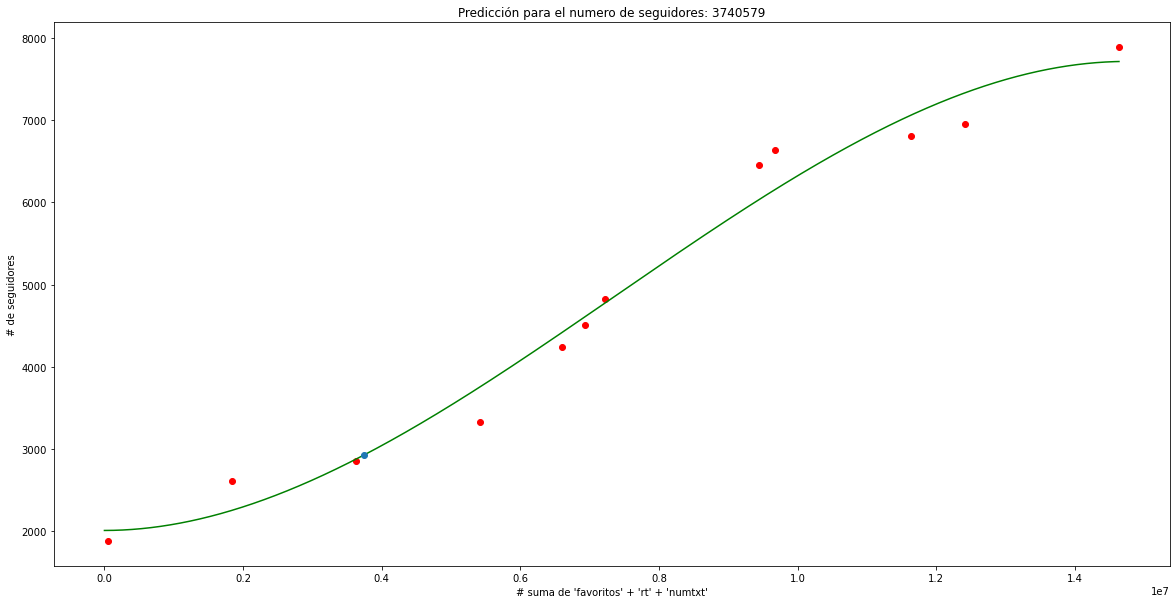

In [574]:
x = list(df2.iloc [:, 0]) # seguidores
y = list(df2.iloc [:, 1]) # Total de la suma
z = api.get_user('MashiRafael').followers_count

pf = PolynomialFeatures(degree = 4)
X = pf.fit_transform(np.array(x).reshape(-1, 1))
regresion_lineal = LinearRegression()
regresion_lineal.fit(X, y) 
pred_x = list(range(0,max(x)+50))

puntos = pf.fit_transform(np.array(pred_x).reshape(-1, 1))
prediccion_entrenamiento = regresion_lineal.predict(puntos)
respuesta =  round(-(prediccion_entrenamiento[z]))
plt.figure(figsize=(20,10))
plt.title('Predicción para el numero de seguidores: ' + str(z))
plt.plot(pred_x, prediccion_entrenamiento, color='green')
plt.scatter(x,y,label="Datos Reales",color="red")
plt.xlabel("# suma de 'favoritos' + 'rt' + 'numtxt'")
plt.ylabel("# de seguidores")
plt.plot(z,prediccion_entrenamiento[z], 'o')
plt.show()

### <center> <span style="color:red">Eventos Discretos | Simpy</span></center> 

#### Elecciones de asambleístas del Azuay  
###### Se necesita 5 asambleístas. Pero en las presentes elecciones 90 aspirantes, Es decir existirán 18 partidos políticos.

In [74]:
import simpy
import random
import matplotlib.pyplot as plt
import math
import numpy as np

In [84]:
NUM_RECINTO = 1 #Esta variable no se esta usando ya que se pide analizar desde un solo mismo recinto

NUM_ASAMBLEISTAS = 5
NUM_CANDIDATOS = 90 
VOTOS = np.zeros(NUM_CANDIDATOS, dtype=int)
NUM_RECINTO = 1 # 
NUM_MENSAS = 3
T_LLEGADAS = 10
TIEMPO_SIMULACION = 120
NUM_VOTANTES = 500 

TIEMPO_ESPERA  = 0.0 # tiempo de espera total
DURACION_TOTAL  = 0.0 # duracion de servicio total
FIN = 0.0 # minuto en el que finaliza

tiempo_esp = {}
tiempo_vot = {}
tiempo_car = {}

In [85]:
llegada = lambda persona, time : print ("---> ", persona," llego en minuto: ", time) #Imprime Llegada
salida = lambda persona, time : print ("<--- ", persona," Sale en minuto: ", time) #Imprime Salida
pasar_v = lambda persona, time, esp : print("<<>> ",persona, " pasa a vota en ", time, " minutos esperando", esp," <<>>") # timE
votacion = lambda persona, time : print(">>>> ",persona, " vota en ", time, " minutos  <<<") #Imprime Votacion
carnet = lambda persona, time : print("/\/\ ",persona, " optiene carnet en ", time, " minutos  /\/\ ") #Imprime Votacion

def votar(persona):
    global DURACION_TOTAL 
    tiempo_votar = random.randint(1,10)
    yield env.timeout(tiempo_votar)
    votacion(persona, tiempo_votar)
    DURACION_TOTAL = DURACION_TOTAL + tiempo_votar # suma total de tiempo
    # Asiganamos un voto aleatoria
    VOTOS[random.randint(0,NUM_CANDIDATOS-1)] = VOTOS[random.randint(0,NUM_CANDIDATOS-1)]  + 1
    tiempo_vot[persona]=env.now
    yield env.process(carnetizacion(persona))

def carnetizacion(persona):
    global DURACION_TOTAL 
    tiempo_carnet = random.randint(1,5)
    yield env.timeout(tiempo_carnet)
    carnet(persona, tiempo_carnet)
    DURACION_TOTAL = DURACION_TOTAL + tiempo_carnet # suma total de tiempo
    # Asiganamos un voto aleatoria
    tiempo_car[persona]=env.now
    
def persona (env, name, mesas):
    global TIEMPO_ESPERA
    global FIN
    llega = env.now # minuto de llegada de persona
    llegada(name, llega)
    tiempo_esp[str(name)] = env.now
    with mesas.request() as request: #Esperamos pasaar a mesas
        yield request # Obtiene turno
        pasa = env.now # Guarda el minuto cuado comienza a ser atendido
        espera = pasa - llega # Calcula el tiempo que espero
        TIEMPO_ESPERA = TIEMPO_ESPERA + espera # Acumula los tiempos de espera
        pasar_v(name, pasa, espera)
        yield env.process(votar(name)) # Invoca al de votar
        deja = env.now #Guarda el minuto en que termina el proceso votar 
        salida(name, deja)
        FIN = deja # Conserva globalmente el ultimo minuto de la simulacion


def elecciones(env, personal):
    llegada = 0
    for i in range(0,NUM_VOTANTES): # Para n clientes
        R = random.random()
        llegada = -T_LLEGADAS * math.log(R) # Distribucion exponencial
        yield env.timeout(llegada)  # Deja transcurrir un tiempo entre uno y otro
        i += 1
        env.process(persona(env, 'Persona %d' % i, personal)) 
        
print ("------------------- Simulacion Elecciones ------------------")
SEMILLA = 30
random.seed (SEMILLA)  # Cualquier valor
env = simpy.Environment() # Crea el objeto entorno de simulacion
personal = simpy.Resource(env, NUM_MENSAS) #Crea las mesas
env.process(elecciones(env, personal)) #Invoca el proceso princial
env.run() #Inicia la simulacion

------------------- Simulacion Elecciones ------------------
--->  Persona 1  llego en minuto:  6.178883937224562
<<>>  Persona 1  pasa a vota en  6.178883937224562  minutos esperando 0.0  <<>>
>>>>  Persona 1  vota en  1  minutos  <<<
/\/\  Persona 1  optiene carnet en  2  minutos  /\/\ 
<---  Persona 1  Sale en minuto:  9.178883937224562
--->  Persona 2  llego en minuto:  18.585374797303096
<<>>  Persona 2  pasa a vota en  18.585374797303096  minutos esperando 0.0  <<>>
--->  Persona 3  llego en minuto:  18.818791585723044
<<>>  Persona 3  pasa a vota en  18.818791585723044  minutos esperando 0.0  <<>>
>>>>  Persona 2  vota en  1  minutos  <<<
/\/\  Persona 2  optiene carnet en  1  minutos  /\/\ 
<---  Persona 2  Sale en minuto:  20.585374797303096
>>>>  Persona 3  vota en  3  minutos  <<<
/\/\  Persona 3  optiene carnet en  1  minutos  /\/\ 
<---  Persona 3  Sale en minuto:  22.818791585723044
--->  Persona 4  llego en minuto:  28.051988794281677
<<>>  Persona 4  pasa a vota en  28.

/\/\  Persona 88  optiene carnet en  4  minutos  /\/\ 
<---  Persona 88  Sale en minuto:  1121.8995208636723
<<>>  Persona 91  pasa a vota en  1121.8995208636723  minutos esperando 1.4334128886778217  <<>>
>>>>  Persona 91  vota en  2  minutos  <<<
/\/\  Persona 89  optiene carnet en  4  minutos  /\/\ 
<---  Persona 89  Sale en minuto:  1124.6274171892285
--->  Persona 92  llego en minuto:  1125.021198175408
<<>>  Persona 92  pasa a vota en  1125.021198175408  minutos esperando 0.0  <<>>
/\/\  Persona 91  optiene carnet en  4  minutos  /\/\ 
<---  Persona 91  Sale en minuto:  1127.8995208636723
>>>>  Persona 90  vota en  8  minutos  <<<
>>>>  Persona 92  vota en  6  minutos  <<<
/\/\  Persona 92  optiene carnet en  1  minutos  /\/\ 
<---  Persona 92  Sale en minuto:  1132.021198175408
/\/\  Persona 90  optiene carnet en  3  minutos  /\/\ 
<---  Persona 90  Sale en minuto:  1132.4941081278046
--->  Persona 93  llego en minuto:  1138.0580716552486
<<>>  Persona 93  pasa a vota en  1138.0

>>>>  Persona 138  vota en  5  minutos  <<<
/\/\  Persona 138  optiene carnet en  2  minutos  /\/\ 
<---  Persona 138  Sale en minuto:  1556.6969841111093
--->  Persona 139  llego en minuto:  1565.9260276618115
<<>>  Persona 139  pasa a vota en  1565.9260276618115  minutos esperando 0.0  <<>>
>>>>  Persona 139  vota en  7  minutos  <<<
--->  Persona 140  llego en minuto:  1577.9195419900043
<<>>  Persona 140  pasa a vota en  1577.9195419900043  minutos esperando 0.0  <<>>
/\/\  Persona 139  optiene carnet en  5  minutos  /\/\ 
<---  Persona 139  Sale en minuto:  1577.9260276618115
--->  Persona 141  llego en minuto:  1580.521014628587
<<>>  Persona 141  pasa a vota en  1580.521014628587  minutos esperando 0.0  <<>>
>>>>  Persona 140  vota en  8  minutos  <<<
/\/\  Persona 140  optiene carnet en  1  minutos  /\/\ 
<---  Persona 140  Sale en minuto:  1586.9195419900043
>>>>  Persona 141  vota en  9  minutos  <<<
--->  Persona 142  llego en minuto:  1590.909759535771
<<>>  Persona 142  pa

/\/\  Persona 189  optiene carnet en  4  minutos  /\/\ 
<---  Persona 189  Sale en minuto:  2104.642872028132
--->  Persona 190  llego en minuto:  2119.7315878612885
<<>>  Persona 190  pasa a vota en  2119.7315878612885  minutos esperando 0.0  <<>>
>>>>  Persona 190  vota en  8  minutos  <<<
/\/\  Persona 190  optiene carnet en  5  minutos  /\/\ 
<---  Persona 190  Sale en minuto:  2132.7315878612885
--->  Persona 191  llego en minuto:  2134.5521993453385
<<>>  Persona 191  pasa a vota en  2134.5521993453385  minutos esperando 0.0  <<>>
>>>>  Persona 191  vota en  3  minutos  <<<
/\/\  Persona 191  optiene carnet en  5  minutos  /\/\ 
<---  Persona 191  Sale en minuto:  2142.5521993453385
--->  Persona 192  llego en minuto:  2154.895865128505
<<>>  Persona 192  pasa a vota en  2154.895865128505  minutos esperando 0.0  <<>>
>>>>  Persona 192  vota en  8  minutos  <<<
--->  Persona 193  llego en minuto:  2164.064419283778
<<>>  Persona 193  pasa a vota en  2164.064419283778  minutos espe

<<>>  Persona 245  pasa a vota en  2705.0329801805583  minutos esperando 0.0  <<>>
/\/\  Persona 244  optiene carnet en  5  minutos  /\/\ 
<---  Persona 244  Sale en minuto:  2708.256821545821
>>>>  Persona 245  vota en  9  minutos  <<<
--->  Persona 246  llego en minuto:  2714.7902934226204
<<>>  Persona 246  pasa a vota en  2714.7902934226204  minutos esperando 0.0  <<>>
>>>>  Persona 246  vota en  2  minutos  <<<
/\/\  Persona 246  optiene carnet en  1  minutos  /\/\ 
<---  Persona 246  Sale en minuto:  2717.7902934226204
/\/\  Persona 245  optiene carnet en  5  minutos  /\/\ 
<---  Persona 245  Sale en minuto:  2719.0329801805583
--->  Persona 247  llego en minuto:  2726.1739482442695
<<>>  Persona 247  pasa a vota en  2726.1739482442695  minutos esperando 0.0  <<>>
>>>>  Persona 247  vota en  10  minutos  <<<
--->  Persona 248  llego en minuto:  2736.5299286081627
<<>>  Persona 248  pasa a vota en  2736.5299286081627  minutos esperando 0.0  <<>>
>>>>  Persona 248  vota en  1  minu

>>>>  Persona 306  vota en  2  minutos  <<<
/\/\  Persona 306  optiene carnet en  2  minutos  /\/\ 
<---  Persona 306  Sale en minuto:  3319.130020085499
--->  Persona 307  llego en minuto:  3323.032445359299
<<>>  Persona 307  pasa a vota en  3323.032445359299  minutos esperando 0.0  <<>>
--->  Persona 308  llego en minuto:  3323.8618728523074
<<>>  Persona 308  pasa a vota en  3323.8618728523074  minutos esperando 0.0  <<>>
>>>>  Persona 308  vota en  1  minutos  <<<
/\/\  Persona 308  optiene carnet en  2  minutos  /\/\ 
<---  Persona 308  Sale en minuto:  3326.8618728523074
--->  Persona 309  llego en minuto:  3328.861221350665
<<>>  Persona 309  pasa a vota en  3328.861221350665  minutos esperando 0.0  <<>>
--->  Persona 310  llego en minuto:  3329.170938896932
<<>>  Persona 310  pasa a vota en  3329.170938896932  minutos esperando 0.0  <<>>
>>>>  Persona 307  vota en  7  minutos  <<<
--->  Persona 311  llego en minuto:  3330.041280745818
/\/\  Persona 307  optiene carnet en  2  m

<<>>  Persona 381  pasa a vota en  4023.6555509772493  minutos esperando 0.0  <<>>
>>>>  Persona 381  vota en  3  minutos  <<<
--->  Persona 382  llego en minuto:  4028.023040356601
<<>>  Persona 382  pasa a vota en  4028.023040356601  minutos esperando 0.0  <<>>
/\/\  Persona 381  optiene carnet en  2  minutos  /\/\ 
<---  Persona 381  Sale en minuto:  4028.6555509772493
>>>>  Persona 382  vota en  4  minutos  <<<
/\/\  Persona 382  optiene carnet en  3  minutos  /\/\ 
<---  Persona 382  Sale en minuto:  4035.023040356601
--->  Persona 383  llego en minuto:  4036.9493632323974
<<>>  Persona 383  pasa a vota en  4036.9493632323974  minutos esperando 0.0  <<>>
--->  Persona 384  llego en minuto:  4038.4004913011017
<<>>  Persona 384  pasa a vota en  4038.4004913011017  minutos esperando 0.0  <<>>
--->  Persona 385  llego en minuto:  4039.7709735431595
<<>>  Persona 385  pasa a vota en  4039.7709735431595  minutos esperando 0.0  <<>>
--->  Persona 386  llego en minuto:  4040.705763718826

/\/\  Persona 453  optiene carnet en  4  minutos  /\/\ 
<---  Persona 453  Sale en minuto:  4712.932648927725
--->  Persona 454  llego en minuto:  4715.859820224189
<<>>  Persona 454  pasa a vota en  4715.859820224189  minutos esperando 0.0  <<>>
>>>>  Persona 454  vota en  2  minutos  <<<
/\/\  Persona 454  optiene carnet en  5  minutos  /\/\ 
<---  Persona 454  Sale en minuto:  4722.859820224189
--->  Persona 455  llego en minuto:  4728.6568543592575
<<>>  Persona 455  pasa a vota en  4728.6568543592575  minutos esperando 0.0  <<>>
>>>>  Persona 455  vota en  4  minutos  <<<
/\/\  Persona 455  optiene carnet en  1  minutos  /\/\ 
<---  Persona 455  Sale en minuto:  4733.6568543592575
--->  Persona 456  llego en minuto:  4736.2950202142765
<<>>  Persona 456  pasa a vota en  4736.2950202142765  minutos esperando 0.0  <<>>
>>>>  Persona 456  vota en  9  minutos  <<<
/\/\  Persona 456  optiene carnet en  4  minutos  /\/\ 
<---  Persona 456  Sale en minuto:  4749.2950202142765
--->  Perso

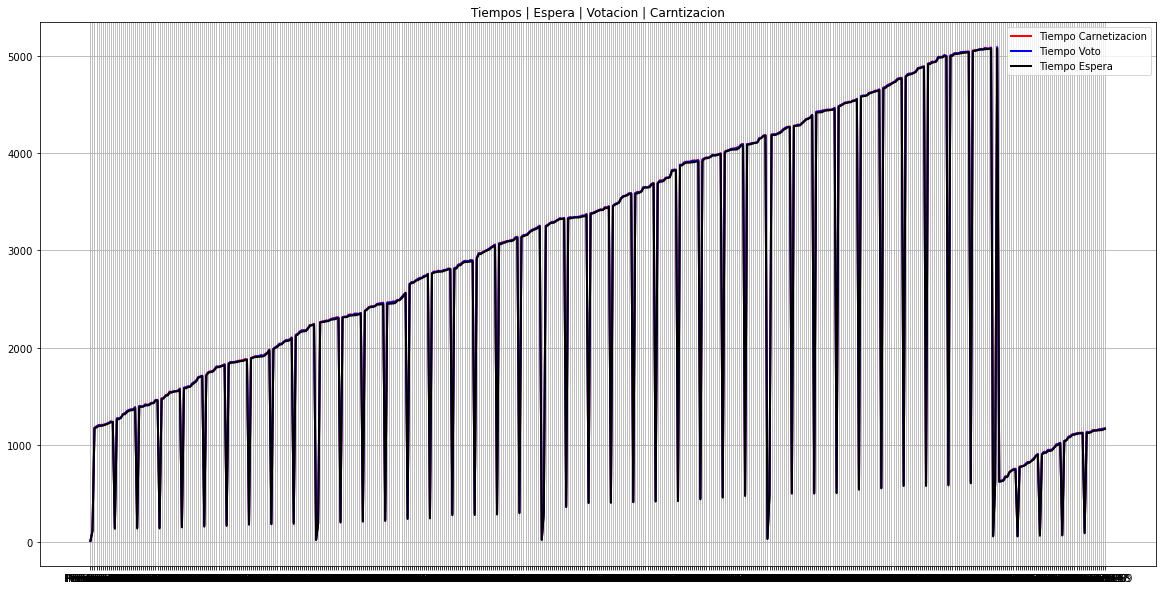

In [86]:
plt.figure(figsize=(20,10))

datos=sorted(tiempo_car.items())
x, y =zip(*datos)
plt.plot(x,y,linewidth=2,color='red', label='Tiempo Carnetizacion')

datos=sorted(tiempo_vot.items())
x, y =zip(*datos)
plt.plot(x,y,linewidth=2,color='blue', label='Tiempo Voto')

datos=sorted(tiempo_esp.items())
x, y =zip(*datos)
plt.plot(x,y,linewidth=2,color='black', label='Tiempo Espera')

plt.legend()
plt.title("Tiempos | Espera | Votacion | Carntizacion")
plt.grid(True) 
plt.show()

##### <center> <span style="color:blue">Resultados Eleciones </span></center> 